In [1]:
from settings import BASE_DIR
import pandas as pd
import seaborn as sns

"""from importlib.machinery import SourceFileLoader
foo = SourceFileLoader("settings",
                       "C:\\Users\\biagi\\Desktop\\university\\Second Year\\First Semester\\advanced machine learning\\prog\\Advanced_Machine_Learning_Project\\settings.py").load_module()
from settings import BASE_DIR"""
df1 = pd.read_csv(
    "{BaseDir}/Advanced_Machine_Learning_Project/ML/RandomSearchModelsResult.csv".format(BaseDir=BASE_DIR)
)
df2 = pd.read_csv(
    "{BaseDir}/Advanced_Machine_Learning_Project/ML/ModelResultsAnna.csv".format(BaseDir=BASE_DIR)
)

df2[["Model", "Mean_fit_time", "Mean_score_time"]] = df2[["model", "mean_fit_time", "mean_score_time"]]
df2 = df2.drop(["model", "mean_fit_time", "mean_score_time"], axis=1)

frames = [df1, df2]
df = pd.concat(frames)
df[["embedding", "Model"]] = df.Model.str.split('(TFIDF|W2V)', expand=True).drop(0,axis=1)

/home/annabelle/Documents


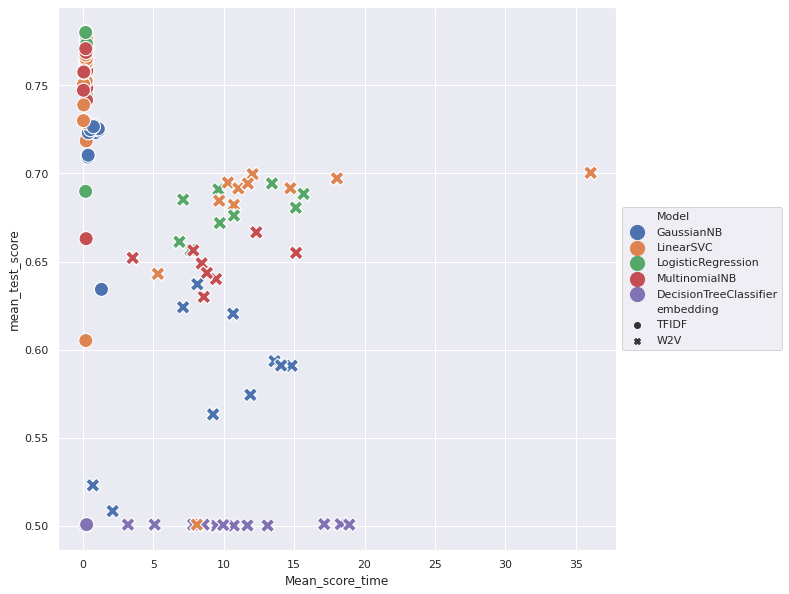

In [2]:
sns.set(rc={"figure.figsize":(10, 10)})
graph = sns.scatterplot(
    x='Mean_score_time',
    y='mean_test_score',
    size='Model',
    sizes=(200,200),
    data=df,
    hue='Model',
    style='embedding'
)

graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))

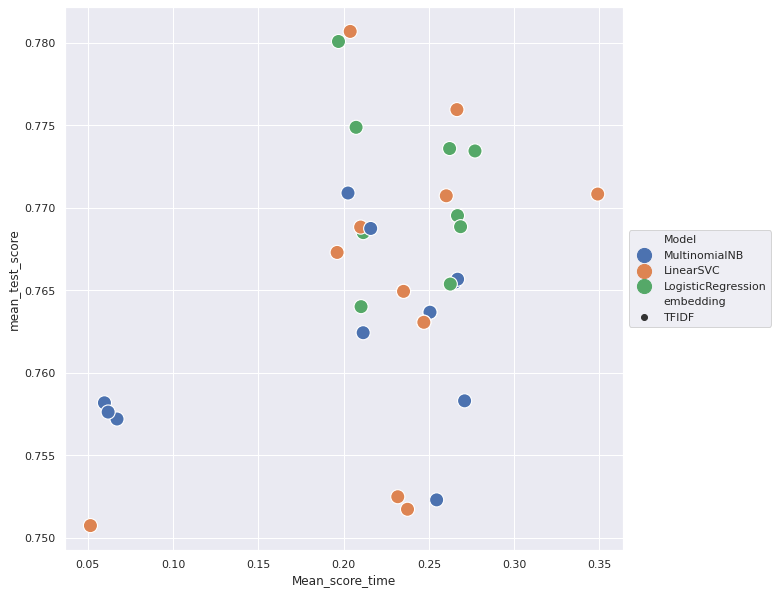

In [3]:
sns.set(rc={"figure.figsize":(10, 10)})
graph = sns.scatterplot(
    x='Mean_score_time',
    y='mean_test_score',
    size='Model',
    sizes=(200,200),
    data=df.query('mean_test_score > 0.75'),
    hue='Model',
    style='embedding'
)

graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))

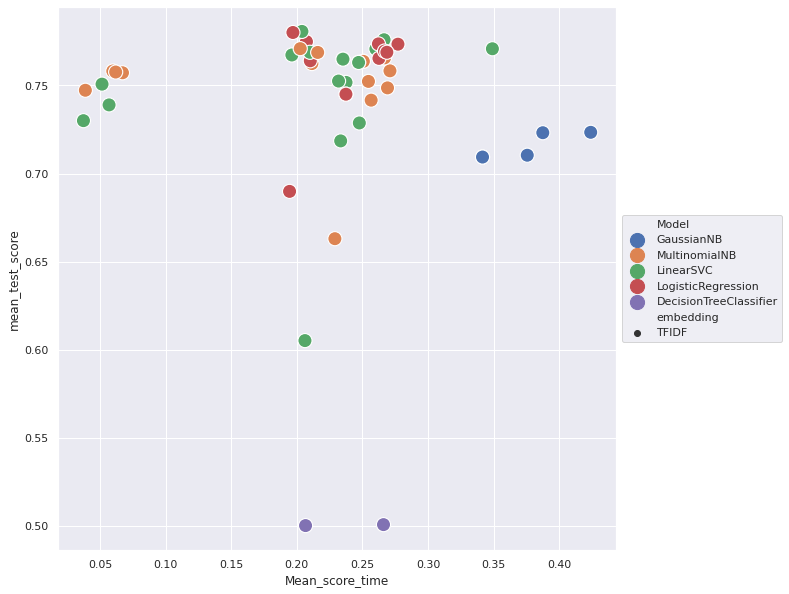

In [4]:
sns.set(rc={"figure.figsize":(10, 10)})
graph = sns.scatterplot(
    x='Mean_score_time',
    y='mean_test_score',
    size='Model',
    sizes=(200,200),
    data=df.query('Mean_score_time < 0.5'),
    hue='Model',
    style='embedding'
)

graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))

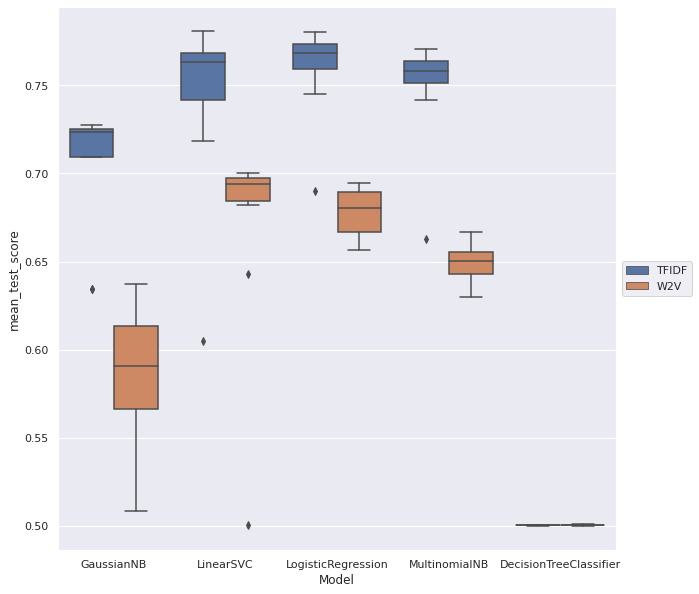

In [5]:
sns.set(rc={"figure.figsize":(10, 10)})
graph = sns.boxplot(x='Model', y='mean_test_score', data=df, hue='embedding')
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))

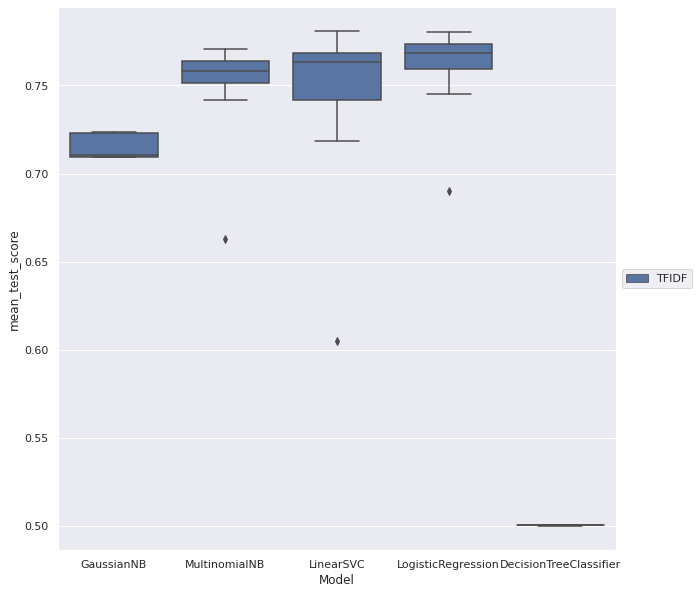

In [6]:
sns.set(rc={"figure.figsize":(10, 10)})
graph = sns.boxplot(x='Model', y='mean_test_score', data=df.query('Mean_score_time < 0.5'), hue='embedding')
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))